# Ex. Solving an ODE with Numerical Modeling

In [1]:
import numpy as np
import sympy
from scipy import integrate
import matplotlib.pyplot as plt
import ipywidgets

In [2]:
sympy.init_printing()

## Harmonic oscillator

### Numerical manipulation (with SciPy)

Equation:
    
$$
\left(\frac{d^2}{dt^2} + \omega_0^2\right) x(t) = 0
$$

write this as two first-order equations

$$
x'(t) = y(t)
$$
$$
y'(t) = \omega_0^2 x(t)
$$

In [40]:
def dxdt(X,t=0):
    omega0 = 1
    return np.array([ X[1] , -omega0**2 * X[0] ])

In [41]:
xvalues = np.linspace(0, 10, 30)
scipysoln = integrate.odeint(dxdt, [2,3], xvalues)

In [42]:
scipysoln

array([[ 2.        ,  3.        ],
       [ 2.89637077,  2.14733236],
       [ 3.45174447,  1.04185393],
       [ 3.60073574, -0.1862845 ],
       [ 3.32580335, -1.39249122],
       [ 2.65931583, -2.43475645],
       [ 1.67974039, -3.19037178],
       [ 0.50240491, -3.57037663],
       [-0.73407997, -3.53003211],
       [-1.88413978, -3.07408806],
       [-2.8123751 , -2.25622393],
       [-3.40950246, -1.17272892],
       [-3.60522059,  0.04883442],
       [-3.37648706,  1.26464837],
       [-2.75023125,  2.3315721 ],
       [-1.80018384,  3.123994  ],
       [-0.63819632,  3.54862026],
       [ 0.59892766,  3.5554586 ],
       [ 1.76553839,  3.14370393],
       [ 2.72428786,  2.36183315],
       [ 3.36230018,  1.30189781],
       [ 3.60446046,  0.08868679],
       [ 3.42225859, -1.13496556],
       [ 2.83714563, -2.22499558],
       [ 1.91800843, -3.05307129],
       [ 0.7730593 , -3.52170129],
       [-0.46290403, -3.57571259],
       [-1.64436853, -3.2087463 ],
       [-2.63223741,

/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


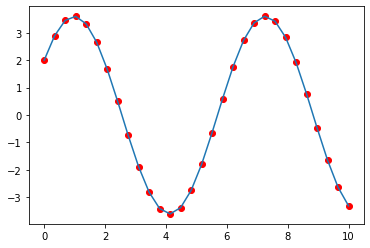

In [43]:
plt.plot(xvalues,scipysoln[:,0],'ro',
         xvalues,expr_func(xvalues));

## Damped Harmonic Oscillator

In [44]:
t = sympy.Symbol("t")
omega0 = sympy.Symbol("omega0")
gamma = sympy.Symbol("gamma")
x = sympy.Function('x')

In [45]:
x = sympy.Function("x")

In [46]:
ode = x(t).diff(t, 2) + 2 * gamma * omega0 * x(t).diff(t) + omega0**2 * x(t)

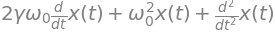

In [47]:
ode

In [48]:
ode_sol = sympy.dsolve(ode)

In [49]:
ode_sol

In [50]:
ics = {x(0): 1, x(t).diff(t).subs(t, 0): 0}

In [51]:
ics

⎧         ⎛d       ⎞│      ⎫
⎨x(0): 1, ⎜──(x(t))⎟│   : 0⎬
⎩         ⎝dt      ⎠│t=0   ⎭

In [52]:
ode_sol = sympy.dsolve(ode,ics=ics)

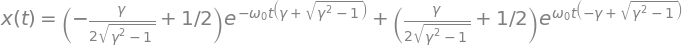

In [53]:
ode_sol

In [54]:
# sol = ode_sol
# known_params = [omega0, gamma]
# x = t
# free_params = sol.free_symbols - set(known_params)
# eqs = [(sol.lhs.diff(x, n) - sol.rhs.diff(x, n)).subs(x, 0).subs(ics)
#        for n in range(len(ics))]
# sol_params = sympy.solve(eqs, free_params)
# x_t_sol = sol.subs(sol_params)

In [55]:
# eqs

In [56]:
# free_params

In [57]:
# type(free_params)

In [58]:
# ode_sol

In [59]:
# x_t_sol

In [60]:
# x_t_critical = sympy.limit(x_t_sol.rhs, gamma, 1)

In [61]:
# x_t_critical

In [62]:
def plotDampedOsc(omega0in=15,gammain=0.1):
#     xsoln = sympy.lambdify(t, x_t_sol.rhs.subs({omega0: omega0in, gamma: gammain}), 'numpy')
    xsoln = sympy.lambdify(t, ode_sol.rhs.subs({omega0: omega0in, gamma: gammain}), 'numpy')
    taxis = np.linspace(0, 3, 100)
    plt.plot(taxis,xsoln(taxis).real)
    plt.ylim(-1.5,1.5)

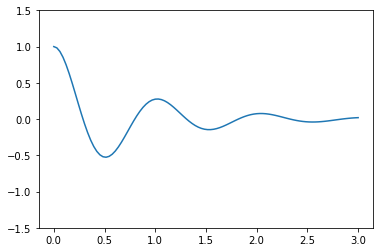

In [63]:
plotDampedOsc(2*np.pi, 0.2)

In [64]:
ipywidgets.interact(plotDampedOsc,omega0in=(1,20),gammain=(0.02,1.5,0.02))

interactive(children=(IntSlider(value=15, description='omega0in', max=20, min=1), FloatSlider(value=0.1, descr…

<function __main__.plotDampedOsc(omega0in=15, gammain=0.1)>

In [65]:
sympy.limit(x_t_sol.rhs, gamma, 1)

## Lorenz Equations

$$
x'(t) = \sigma(y - x)
$$
$$
y'(t) = x(\rho - z) - y 
$$
$$
z'(t) = x y - \beta z
$$

In [66]:
# define the initial system state (aka x, y, z positions in space)
initial_state = [0.1, 0, 0]

# define the system parameters sigma, rho, and beta
sigma = 10.
rho   = 28.
beta  = 8./3.

# define the time points to solve for, evenly spaced between the start and end times
start_time = 1
end_time = 60
interval = 100
time_points = np.linspace(start_time, end_time, end_time * interval)

In [67]:
time_points

array([ 1.        ,  1.00983497,  1.01966994, ..., 59.98033006,
       59.99016503, 60.        ])

In [68]:
def lorenz(state, t):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

In [69]:
lorenzsoln = integrate.odeint(lorenz, initial_state, time_points)

/var/folders/qk/hv87dc8s27d5rgnhn23fklgh0000gn/T/ipykernel_21964/185651116.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


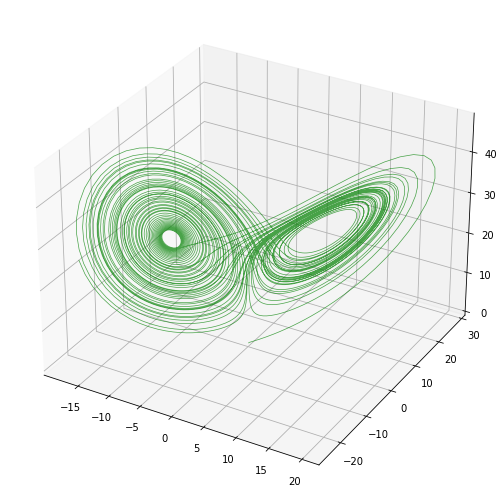

In [70]:
fig = plt.figure(figsize=(12, 9))
ax = fig.gca(projection='3d')
x = lorenzsoln[:, 0]
y = lorenzsoln[:, 1]
z = lorenzsoln[:, 2]
ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)

In [71]:
import ipywidgets

In [72]:
def plotlorenz(end=1):
    start_time = 1
    end_time = end
    interval = 100
    time_points = np.linspace(start_time, end_time, end_time * interval)
    lorenzsoln = integrate.odeint(lorenz, initial_state, time_points)
    fig = plt.figure(figsize=(12, 9))
    ax = fig.gca(projection='3d')
    x = lorenzsoln[:, 0]
    y = lorenzsoln[:, 1]
    z = lorenzsoln[:, 2]
    ax.plot(x, y, z, color='g', alpha=0.7, linewidth=0.7)

ipywidgets.interact(plotlorenz,end=(1,60))

interactive(children=(IntSlider(value=1, description='end', max=60, min=1), Output()), _dom_classes=('widget-i…

<function __main__.plotlorenz(end=1)>